In [32]:
from sympy import symbols,init_printing,Derivative,diff,simplify,solve, cos, sin, relational, poly, expand, Matrix, S, Mul, Expr, Function, lambdify
from sympy.physics.vector import vlatex
from sympy.abc import i,j,k,l,m,n,o,p
import numpy as np
import scipy.integrate as integrate
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from IPython.display import display, Math

init_printing(latex_printer=vlatex, latex_mode='inline')

In [6]:
t = symbols('t')

g = S(9.8)
k = S(1.0)
l = [S(1.0)] * 2
m = [S(1.0)] * 3
r = [temp_l/2 for temp_l in l]
I = [(temp_m * temp_l**2)/12 for temp_m,temp_l in zip(m,l)]

theta = list(w(t) for w in symbols('theta0:2'))
theta_dot = [Derivative(w, t) for w in theta]
theta_ddot = [Derivative(w, t, t) for w in theta]

d = Function('d')(t)
d_dot = Derivative(d, t)
d_ddot = Derivative(d, t, t)

In [7]:
x = [None] * 3
y = [None] * 3
x_dot = [None] * 3
y_dot = [None] * 3

x[0] = r[0] * cos(theta[0]) + d
y[0] = r[0] * sin(theta[0])
x[1] = l[1] * cos(theta[0]) + r[1] * cos(theta[0] + theta[1]) + d
y[1] = l[1] * sin(theta[0]) + r[1] * sin(theta[0] + theta[1])
x[2] = d

x_dot[0] = diff(x[0], t)
y_dot[0] = diff(y[0], t)
x_dot[1] = diff(x[1], t)
y_dot[1] = diff(y[1], t)
x_dot[2] = diff(x[2], t)

In [8]:
kinetic = (m[0] * (x_dot[0] ** 2 + y_dot[0] ** 2)
           + m[1] * (x_dot[1] ** 2 + y_dot[1] ** 2)
           + I[0] * (theta_dot[0]               )**2
           + I[1] * (theta_dot[0] + theta_dot[1])**2
           + m[2] * (x_dot[2] ** 2)) / 2

potential = (m[0] * g * y[0]) + (m[1] * g * y[1]) + (k*d**2)/2
lagrange = kinetic - potential

In [9]:
simplify(kinetic)

In [10]:
simplify(potential)

In [11]:
simplify(lagrange)

$$x_0= r_0 \cos{(\theta_0)}$$
$$y_0= r_0 \sin{(\theta_0)}$$
$$x_1= l_0 \cos{(\theta_0)} + r_1 \cos{(\theta_0 + \theta_1)}$$
$$y_1= l_0 \sin{(\theta_0)} + r_1 \sin{(\theta_0 + \theta_1)}$$

$$\dot{x_0}= -r_0 \sin{(\theta_0)}\dot{\theta_0}$$
$$\dot{y_0}= r_0 \cos{(\theta_0)}\dot{\theta_0}$$
$$\dot{x_1}= -(l_0 \sin{(\theta_0)} + r_1 \sin{(\theta_0 + \theta_1)})\dot{\theta_0} - r_1\sin{(\theta_0 + \theta_1)}\dot{\theta_1}$$
$$\dot{y_1}= (l_0 \cos{(\theta_0)} + r_1 \cos{(\theta_0 + \theta_1)})\dot{\theta_0} + r_1\cos{(\theta_0 + \theta_1)}\dot{\theta_1}$$

In [12]:
L = [None] * 3
L[0] = diff(lagrange, theta_dot[0], t) - diff(lagrange, theta[0])
L[1] = diff(lagrange, theta_dot[1], t) - diff(lagrange, theta[1])
L[2] = diff(lagrange, d_dot, t) - diff(lagrange, d)

In [13]:
simplify(L[0])

In [14]:
simplify(L[1])

In [15]:
simplify(L[2])

In [17]:
solution = solve(L, [theta_ddot[0], theta_ddot[1], d_ddot])

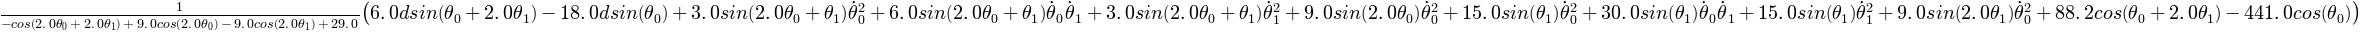

In [26]:
solution[theta_ddot[0]]

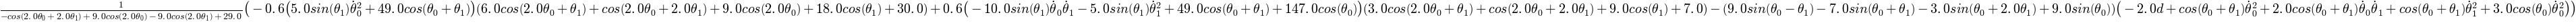

In [27]:
solution[theta_ddot[1]]

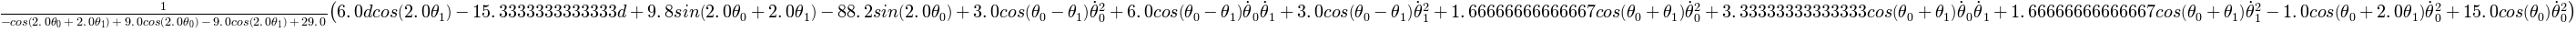

In [28]:
solution[d_ddot]

In [40]:
inputs = [(theta_dot[0], i), (theta[0], j), (theta_dot[1], k), (theta[1], n), (d_dot, p), (d, o)]

LS = [None] * 3

In [41]:
LS[0] = lambdify((j, i, n, k, o, p), simplify(solution[theta_ddot[0]]).subs(inputs))

In [45]:
LS[1] = lambdify((j, i, n, k, o, p), simplify(solution[theta_ddot[1]]).subs(inputs))

KeyError: cos(2*theta0(t))

In [44]:
LS[2] = lambdify((j, i, n, k, o, p), simplify(solution[d_ddot]).subs(inputs))

In [36]:
LS[0](0,0,0,0,0,0)